In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
X,Y=make_circles(n_samples=1000,noise=0.02)

In [4]:
x1=X[:,0]
x2=X[:,1]

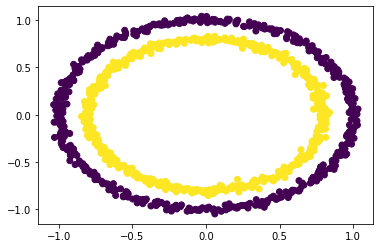

In [5]:
plt.scatter(x1,x2,c=Y)

In [6]:
x3=np.exp(-(X** 2).sum(1))

x3(z축)에 X의 원소 1000개를 제곱 후 음수가 나올경우 exp(다시 제곱함수)를 사용한후 값에 +1을 하여 노란 데이터 셋과 보라 데이터 셋의 기준을 반대로 나누었음 데이터 선형 셋을 구분하는 데에 있어 위 아래 바뀌는 건 상관없기 때문에 수업에서 사용한 것과 반대로 적용하여 사용하였음


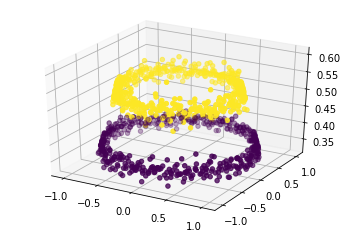

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x1,x2,x3,c=Y)

결과와 같이 노란 데이터 셋은 위로 보라 데이터 셋은 아래로 내려감


## SYM테스트 #1


In [8]:
from sklearn.svm import SVC
model1=SVC(kernel ='linear')


In [9]:
model1.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):    
  import matplotlib as mpl    
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),np.arange(ymin, ymax, (ymax-ymin)/1000))    
  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)    
  fig = plt.figure(figsize=(10,10))    
  plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)    
  plt.scatter(X[:, 0], X[:, 1], c=y)    
  plt.xlim(xmin, xmax)    
  plt.ylim(ymin, ymax)    
  plt.title(title)    
  plt.xlabel("x1")    
  plt.ylabel("x2") 

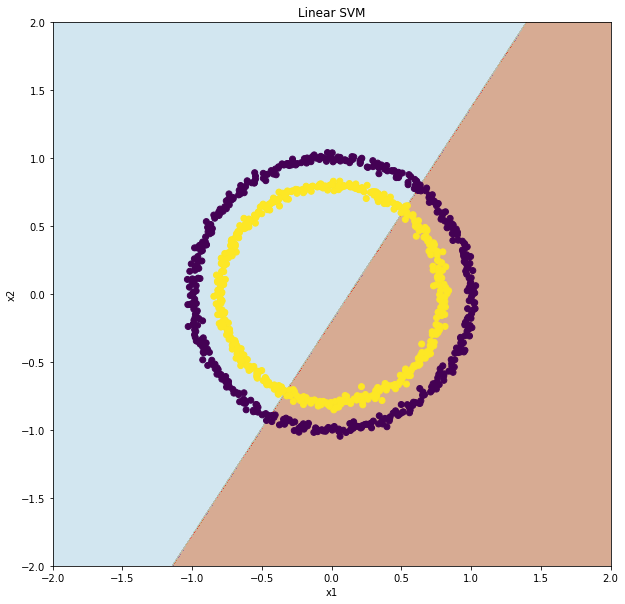

In [11]:
PlotSVM(X,Y,model=model1,title='Linear SVM')



```
# 코드로 형식 지정됨
```

## SVM테스트 #2

In [12]:
X.shape

(1000, 2)

In [13]:
X2=np.vstack((x1,x2,x3)).T

In [14]:
model2=SVC(kernel='linear')

In [15]:
model2.fit(X2,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
def PlotSVM3D(X, Y, model):  
  import numpy as np  
  X1 = X[:, 0]  
  X2 = X[:, 1] 
  X3 = X[:, 2]  
  w = model.coef_   
  b = model.intercept_   
  x1, x2 = np.meshgrid(X1, X2)   
  x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]   
  fig = plt.figure()   
  axes2 = fig.add_subplot(111, projection = '3d')   
  axes2.scatter(X1, X2, X3, c = Y)  
  axes1 = fig.gca(projection = '3d')   
  axes1.plot_surface(x1, x2, x3, alpha = 0.01) 

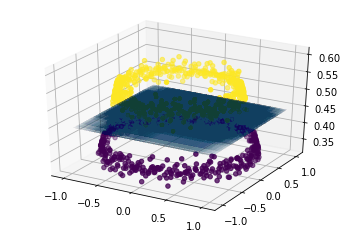

In [17]:
PlotSVM3D(X2,Y,model=model2)

선형적으로 잘 잘렸다고 보여주는 결과값


##SVM 테스트 #3(rbf-수업용)



In [18]:
model3=SVC(kernel='rbf')

In [19]:
model3.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

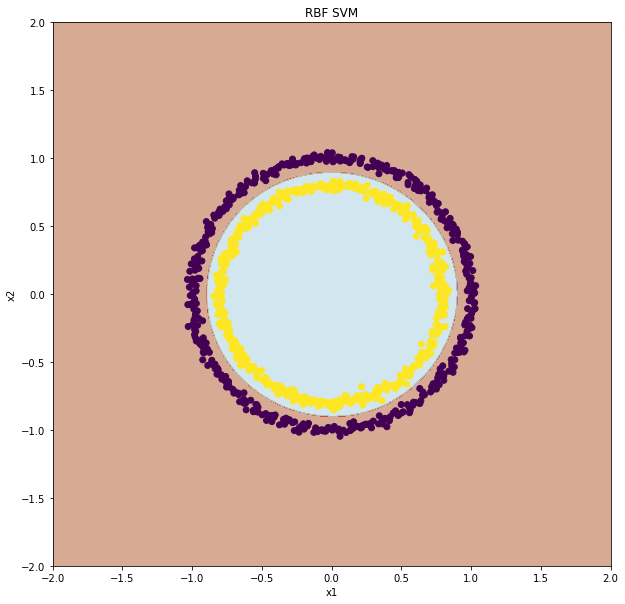

In [20]:
PlotSVM(X,Y,model=model3,title='RBF SVM')